In [92]:
from scipy.stats import ttest_ind
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
pd.options.display.float_format = '{:,.5f}'.format

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [93]:
dffifa = pd.read_csv('fifa.csv', index_col=0, low_memory = False)
dffifa.keys()

Index(['short_name', 'overall', 'club', 'value_eur', 'wage_eur', 'player_positions', 'year', 'potential', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
       '

In [99]:
dffifa = dffifa[dffifa.value_eur != 0]
dffifa['log_value_eur'] = np.log(dffifa[['value_eur']])
dffifa = dffifa.dropna(axis=0, subset=['pace']) 
dffifa.isnull().sum()

short_name                        0
overall                           0
club                              0
value_eur                         0
wage_eur                          0
player_positions                  0
year                              0
potential                         0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
team_position                     8
team_jersey_number                8
joined                         5360
contract_valid_until              8
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
gk_diving                     74905
gk_handling                   74905
gk_kicking                    74905
gk_reflexes                   74905
gk_speed                      74905
gk_positioning              

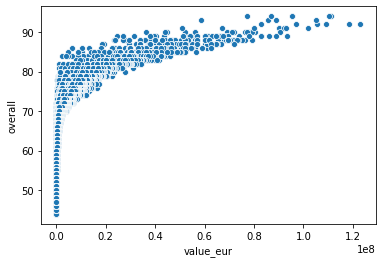

In [100]:
ax = sns.scatterplot(x="value_eur", y="overall", data=dffifa)

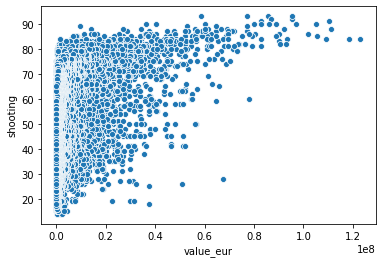

In [101]:
ax = sns.scatterplot(x="value_eur", y="shooting", data=dffifa)

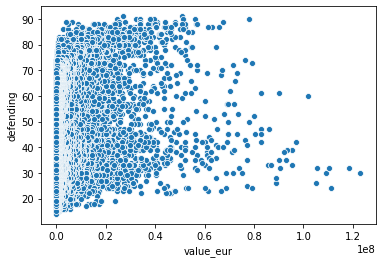

In [102]:
ax = sns.scatterplot(x="value_eur", y="defending", data=dffifa)

In [103]:
import statsmodels.api as sm

In [104]:
dffifa['intercept']=1
lm=sm.OLS(dffifa['log_value_eur'],dffifa[['intercept','overall','pace', 'shooting', 'passing', 'dribbling', 'defending']])
slr_results = lm.fit()
slr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_value_eur   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 1.327e+05
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:18:12   Log-Likelihood:                -37333.
No. Observations:               74905   AIC:                         7.468e+04
Df Residuals:                   74898   BIC:                         7.474e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7616      0.016     47.569      0.000       0.730       0.793
overall        0.1894      0.000    555.631      0.000       0.189       0.190
pace           0.0082      0.000     48.363      0.000       0.008       0.009
shooting      -0.0041      0.000    -19.509      0.000      -0.005      -0.004
passing       -0.0061      0.000    -20.232      0.000      -0.007      -0.006
dribbling      0.0092      0.000     25.865      0.000       0.008       0.010
defending     -0.0049      0.000    -33.213      0.000      -0.005      -0.005
==============================================================================
Omnibus:                    15677.831   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56238.272
Skew:                          -1.030   Prob(JB):                         0.00
Kurtosis:                       6.711   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

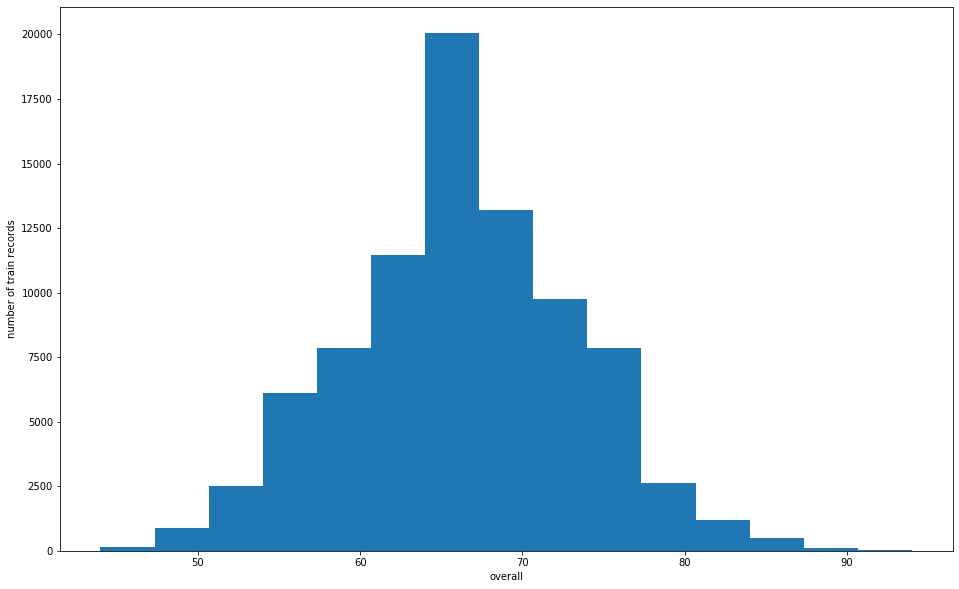

In [43]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(dffifa['overall'], bins=15)
plt.xlabel('overall')
plt.ylabel('number of train records')
plt.show()

In [44]:
overall = dffifa['overall']
value_eur = dffifa['value_eur']
value_log_eur = np.log(value_eur)

overall_mean = np.mean(overall)
value_mean = np.mean(value_eur)
print("overall mean value:",overall_mean)
print("value mean value:",value_mean)
overall_std = np.std(overall)
value_std = np.std(value_eur)
print("overall std value:",overall_std)
print("value std value:",value_std)

overall mean value: 66.12693270679814
value mean value: 2265218.753337368
overall std value: 7.046520425474
value std value: 5196509.226234422


In [45]:
ttest,pval = ttest_ind(overall,value_eur)
print("p-value", pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


In [46]:
from scipy.stats import pearsonr
corr, p = pearsonr(overall, value_eur)
print(p)

0.0


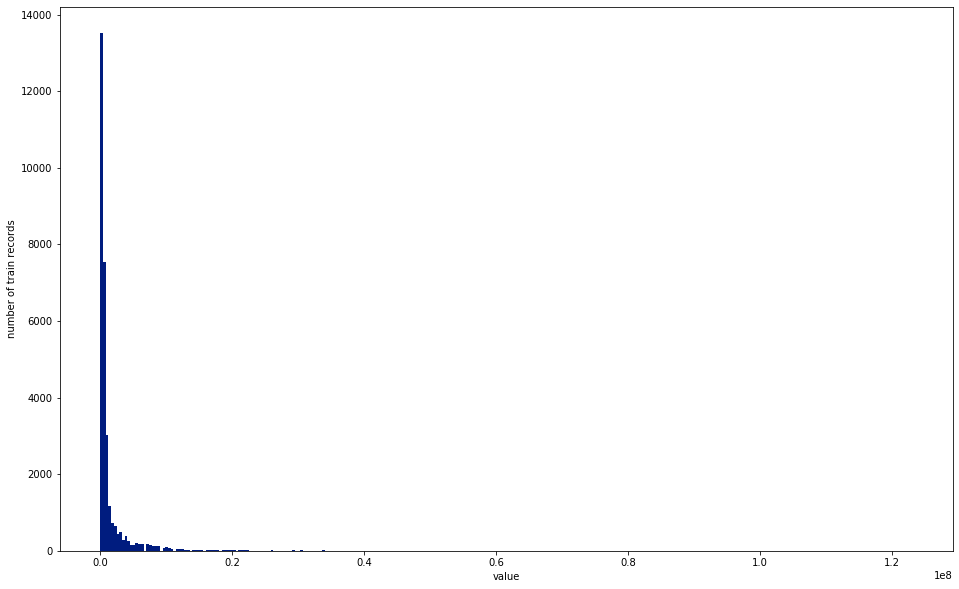

In [16]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['value_eur'], bins=300)
plt.xlabel('value')
plt.ylabel('number of train records')
plt.show()

In [17]:
df_pca['log_value'] = np.log(df_pca[['value_eur']])

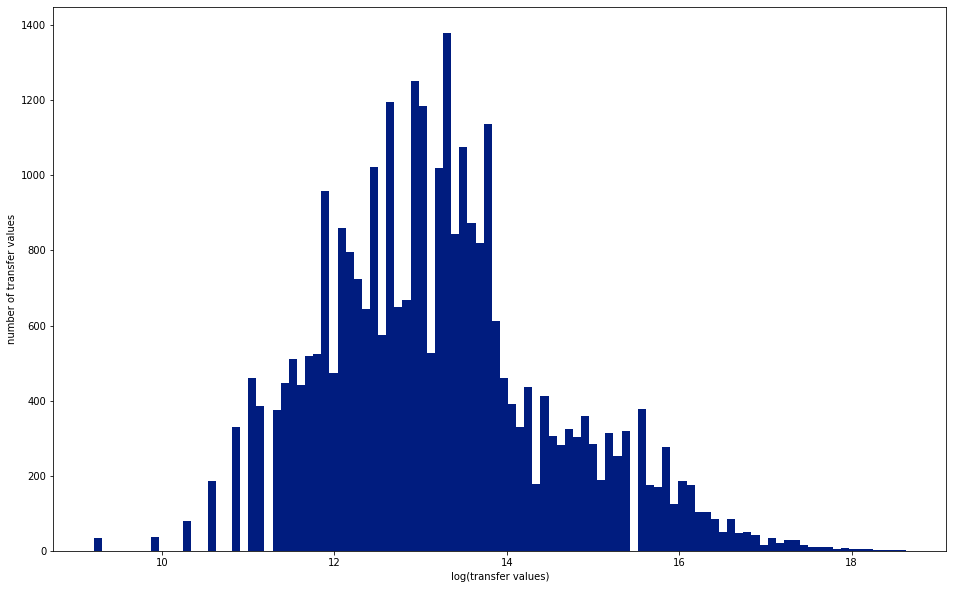

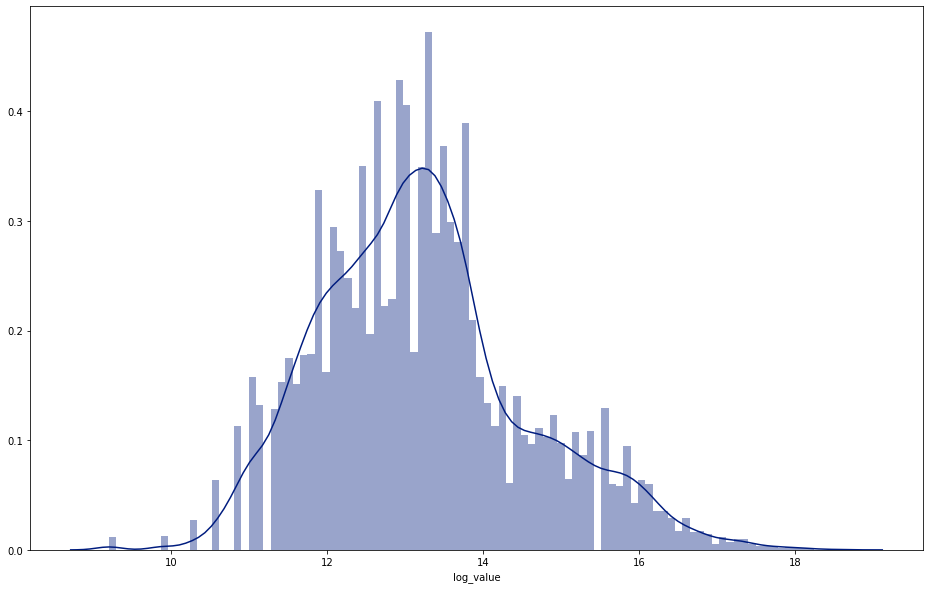

In [18]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.hist(df_pca['log_value'] .values, bins=100)
plt.xlabel('log(transfer values)')
plt.ylabel('number of transfer values')
plt.show()
sns.distplot(df_pca['log_value'] , bins =100)

In [19]:
selection = nn_df.index.to_list()
selection

[68017,
 67923,
 67916,
 67986,
 67856,
 68007,
 68241,
 67884,
 67902,
 67952,
 67949,
 68137,
 67923,
 67920,
 67826,
 68042,
 67839,
 67993,
 67909,
 68023,
 67921,
 68058,
 68165,
 68189,
 68403,
 68791,
 68601,
 68041,
 68142,
 68282,
 67953,
 67917,
 68788,
 68169,
 67885,
 68102,
 50664,
 68139,
 52003,
 68668,
 69117,
 69201,
 70250,
 1614,
 68166,
 68536,
 407,
 68076,
 69275,
 68615,
 68463,
 68276,
 68683,
 68248,
 68463,
 35022,
 68683,
 68332,
 68344,
 68994,
 68507,
 68698,
 69223,
 68417,
 70809,
 67945,
 68844,
 69819,
 35023,
 70432,
 70943,
 53876,
 53848,
 55648,
 70632,
 70798,
 70763,
 71152,
 75594,
 73791,
 77151,
 76073,
 5855,
 39722,
 75402,
 55027,
 76201,
 72726,
 72855,
 79218,
 74843,
 59388,
 77421,
 73389,
 74521,
 76491,
 75504,
 76200,
 73467,
 74643,
 73051,
 62484,
 79535,
 75419,
 62167,
 11435,
 11720,
 77814,
 60852,
 79911,
 80711,
 81926,
 46740,
 63612,
 79720,
 80116,
 65463,
 15365,
 63899,
 80723,
 80760,
 81544,
 82188,
 81743,
 14964,
 157

In [20]:
from sklearn.model_selection import train_test_split


X = df_pca.drop(['log_value','value_eur', 'club', 'short_name'], axis=1)
y = df_pca[['log_value']]

In [21]:
X_selected = X.loc[selection]
y_selected = y.loc[selection]


# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [22]:
X_test = X_test.append(X_selected)
X_test = X_test.loc[~X_test.index.duplicated(keep='first')]
X_test = X_test.dropna()
X_test.loc[selection]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,pc1,pc2,pc3,pc4,pc5,pc6
68017,-6.171037,-2.191389,2.401160,-1.984273,1.133113,-0.360958
67923,-7.082572,-2.466070,2.409195,-1.065906,1.148686,0.023014
67916,-6.772345,-2.345889,1.780103,-1.925966,1.877153,-0.394646
67986,-5.936113,-3.278158,2.466489,1.701635,2.090047,0.282756
67856,-6.263293,-3.934364,1.930044,2.385647,2.476051,-0.223277
68007,-5.679887,-2.746835,1.912474,1.367323,2.226139,0.054532
68241,-5.947918,-3.262787,1.696915,2.045924,1.455504,-0.239528
67884,6.797862,-0.244053,2.481755,-1.220151,4.627056,0.109863
67902,7.102035,-0.284562,2.801905,-1.265803,4.319049,0.018858
67952,7.325360,-0.265433,2.781251,-0.932771,4.547424,0.139962


In [23]:
y_test = y_test.append(y_selected)
y_test = y_test.loc[~y_test.index.duplicated(keep='first')]
y_test = y_test.dropna()
y_test.loc[selection]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


,log_value
68017,17.073607
67923,17.370859
67916,17.529083
67986,17.216708
67856,16.648724
68007,17.111347
68241,16.380460
67884,17.073607
67902,16.759950
67952,16.380460


In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.7702


In [26]:
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

print('Explained Variance Score: %.4f' % explained_variance_score(y_test, pred))
print('Max Error: %.4f' % max_error(y_test, pred))
print('Mean Absolute Error: %.4f' % mean_absolute_error(y_test, pred))
print('Mean Squared Error: %.4f' % metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error: %.4f' %  np.sqrt(metrics.mean_squared_error(y_test, pred)))

Explained Variance Score: 0.7702
Max Error: 3.7325
Mean Absolute Error: 0.4973
Mean Squared Error: 0.4280
Root Mean Squared Error: 0.6542


In [27]:
df_xtest = pd.DataFrame(X_test)
df_xtest.rename(columns={df_xtest.columns[0]: "pc1", df_xtest.columns[1]: "pc2", df_xtest.columns[2]: "pc3", df_xtest.columns[3]: "pc4", df_xtest.columns[4]: "pc5", df_xtest.columns[5]: "pc6"}, inplace = True)

In [28]:
df_ytest = pd.DataFrame(y_test)

In [29]:
df_merged_features = pd.merge(df_xtest, df_ytest, left_index=True, right_index=True)

In [30]:
df_merged_features = df_merged_features.reset_index(drop=True)

In [31]:
pd.options.display.float_format = '{:,.2f}'.format
df_pred = pd.DataFrame({'Predicted Log': pred.flatten()})
df_pred['Predicted'] = np.exp(df_pred) - 1
df_pred.head()

,Predicted Log,Predicted
0,13.61,"817,285.51"
1,12.54,"280,653.74"
2,12.14,"186,934.62"
3,13.04,"462,286.71"
4,13.07,"475,120.73"


In [32]:
df_merged_pred = pd.merge(df_merged_features, df_pred, left_index=True, right_index=True)
df_merged_pred

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted
0,-2.31,1.38,0.96,0.40,-1.27,-0.41,13.35,13.61,"817,285.51"
1,1.61,1.30,-2.82,-0.10,0.81,-0.80,12.39,12.54,"280,653.74"
2,9.26,-1.22,0.23,-0.24,0.64,-0.18,12.83,12.14,"186,934.62"
3,8.16,-0.77,0.88,0.57,1.54,-0.50,14.22,13.04,"462,286.71"
4,-0.68,-0.38,-1.02,0.98,0.07,-0.35,12.39,13.07,"475,120.73"
5,-1.92,-0.28,-1.66,-0.26,1.00,-0.21,13.17,13.74,"922,846.81"
6,-0.65,2.74,0.32,-0.60,0.18,-0.63,13.22,14.06,"1,282,801.44"
7,-2.87,-2.52,1.91,-1.05,-0.08,-0.66,14.22,14.75,"2,545,751.64"
8,-0.11,-1.57,2.68,-0.60,-2.18,-0.54,13.82,13.34,"621,790.52"
9,-1.90,1.58,-0.27,0.07,-0.33,-0.09,13.49,13.62,"824,085.47"


In [33]:
df_predictions = pd.merge(df_merged_pred, df_pca, how='left', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'log_value'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'log_value']).sort_values(by=['log_value'], ascending=False)
df_predictions

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted,value_eur,short_name,club
4607,-8.49,-3.39,2.16,0.17,2.97,-0.22,18.35,17.45,"37,977,079.10",93000000,E. Hazard,Chelsea
6203,-7.83,-1.84,2.23,2.29,2.67,-0.02,18.11,17.01,"24,353,360.96",73500000,C. Eriksen,Tottenham Hotspur
4611,4.49,-0.19,3.31,-0.59,5.30,0.45,18.09,17.08,"26,287,199.53",72000000,De Gea,Manchester United
3328,-8.96,0.17,1.13,1.44,3.43,0.30,18.02,17.43,"37,080,425.62",67000000,L. Modrić,Real Madrid
3707,-5.41,-2.05,3.76,-3.43,1.07,-0.63,17.98,16.99,"23,875,671.93",64500000,M. Icardi,Inter
4912,-6.45,-1.15,4.85,-1.67,0.11,-0.26,17.95,16.92,"22,219,922.38",62500000,R. Lukaku,Manchester United
1620,6.35,-0.47,3.27,-1.02,4.77,0.26,17.94,16.45,"13,994,146.25",62000000,T. Courtois,Real Madrid
2792,6.65,0.42,4.23,-1.12,4.82,0.28,17.88,16.88,"21,524,568.79",58000000,M. ter Stegen,FC Barcelona
3463,-6.90,-2.46,2.86,-1.86,1.56,-0.24,17.74,16.95,"23,080,183.82",50500000,P. Aubameyang,Arsenal
6130,-7.36,-2.64,2.42,-0.34,1.79,-0.39,17.73,16.78,"19,461,602.07",50000000,N. Fekir,Olympique Lyonnais


In [34]:
neighbors = df_pca.loc[[68017,
 67923,
 67916,
 67986,
 67856,
 68007,
 68241,
 67884,
 67902,
 67952,
 67949,
 68137,
 67923,
 67920,
 67826,
 68042,
 67839,
 67993,
 67909,
 68023,
 67921,
 68058,
 68165,
 68189,
 68403,
 68791,
 68601,
 68041,
 68142,
 68282,
 67953,
 67917,
 68788,
 68169,
 67885,
 68102,
 50664,
 68139,
 52003,
 68668,
 69117,
 69201,
 70250,
 1614,
 68166,
 68536,
 407,
 68076,
 69275,
 68615,
 68463,
 68276,
 68683,
 68248,
 68463,
 35022,
 68683,
 68332,
 68344,
 68994,
 68507,
 68698,
 69223,
 68417,
 70809,
 67945,
 68844,
 69819,
 35023,
 70432,
 70943,
 53876,
 53848,
 55648,
 70632,
 70798,
 70763,
 71152,
 75594,
 73791,
 77151,
 76073,
 5855,
 39722,
 75402,
 55027,
 76201,
 72726,
 72855,
 79218,
 74843,
 59388,
 77421,
 73389,
 74521,
 76491,
 75504,
 76200,
 73467,
 74643,
 73051,
 62484,
 79535,
 75419,
 62167,
 11435,
 11720,
 77814,
 60852,
 79911,
 80711,
 81926,
 46740,
 63612,
 79720,
 80116,
 65463,
 15365,
 63899,
 80723,
 80760,
 81544,
 82188,
 81743,
 14964,
 15710,
 84615,
 83821,
 16800]]

C:\Users\aaron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:129: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [35]:
predictions = pd.merge(df_predictions, neighbors, how='right', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club', 'log_value'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club', 'log_value']).sort_values(by=['log_value'], ascending=False)

In [36]:
scouting_report_pred = pd.merge(predictions, nn_df, how='right', left_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'], right_on=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'value_eur', 'short_name', 'club'])
scouting_report_pred = scouting_report_pred.dropna()
scouting_report_pred.sort_values(by=['transfer'])

,pc1,pc2,pc3,pc4,pc5,pc6,log_value,Predicted Log,Predicted,value_eur,short_name,club,transfer
66,-2.67,-2.61,1.42,0.72,1.00,-0.47,15.52,14.89,"2,937,542.59","5,500,000.00",A. Miranchuk,Lokomotiv Moscow,A. Iwobi
80,-2.69,-2.50,0.60,0.01,1.28,-0.45,14.46,14.81,"2,704,041.23","1,900,000.00",F. Lecarnado,CD Palestino,A. Iwobi
74,-2.81,-2.52,0.68,0.08,0.95,-0.51,14.91,14.67,"2,344,928.43","3,000,000.00",L. Cinterio,Deportes Iquique,A. Iwobi
71,-2.81,-2.56,0.75,0.05,1.02,-0.48,15.15,14.74,"2,515,089.87","3,800,000.00",Gustavo Lobateiro,Internacional,A. Iwobi
7,-7.08,-2.47,2.41,-1.07,1.15,0.02,17.37,16.46,"14,143,666.62","35,000,000.00",M. Depay,Olympique Lyonnais,A. Lacazette
6,-7.08,-2.47,2.41,-1.07,1.15,0.02,17.37,16.46,"14,143,666.62","35,000,000.00",M. Depay,Olympique Lyonnais,A. Lacazette
29,-6.71,-1.83,2.04,-1.33,1.65,-0.35,16.59,16.59,"16,049,719.37","16,000,000.00",K. Gameiro,Valencia CF,A. Lacazette
2,-6.62,-2.06,1.84,-1.72,1.34,-0.32,17.39,16.36,"12,690,951.66","35,500,000.00",A. Martial,Manchester United,A. Lacazette
91,-3.46,0.24,-0.51,0.49,1.18,-0.12,13.82,14.54,"2,071,167.30","1,000,000.00",Fábio Nunes,CD Tondela,A. Maitland-Niles
87,-3.25,0.20,-0.22,0.97,0.84,-0.25,14.00,14.36,"1,726,154.43","1,200,000.00",G. Hamer,PEC Zwolle,A. Maitland-Niles


In [52]:
scouting_actual_pred = scouting_report_pred[['Predicted', 'value_eur', 'short_name', 'transfer']]
scouting_actual_pred = scouting_actual_pred.rename(columns={"value_eur": "Actual", 'short_name': 'Name', 'transfer':'Transfer'})
scouting_actual_pred = scouting_actual_pred.set_index('Name')
scouting_actual_pred = scouting_actual_pred.drop_duplicates()
scouting_actual_pred.sort_values(by=['Transfer'])

,Predicted,Actual,Transfer
Name,,,
A. Miranchuk,"2,937,542.59","5,500,000.00",A. Iwobi
Gustavo Lobateiro,"2,515,089.87","3,800,000.00",A. Iwobi
F. Lecarnado,"2,704,041.23","1,900,000.00",A. Iwobi
L. Cinterio,"2,344,928.43","3,000,000.00",A. Iwobi
K. Gameiro,"16,049,719.37","16,000,000.00",A. Lacazette
A. Martial,"12,690,951.66","35,500,000.00",A. Lacazette
M. Depay,"14,143,666.62","35,000,000.00",A. Lacazette
Fábio Nunes,"2,071,167.30","1,000,000.00",A. Maitland-Niles
G. Hamer,"1,726,154.43","1,200,000.00",A. Maitland-Niles


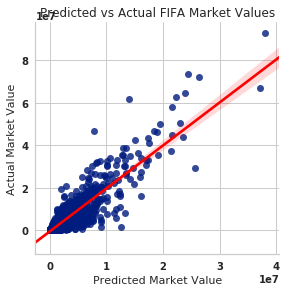

In [53]:
lm = sns.lmplot(x="Predicted", y="value_eur", data=df_predictions, line_kws={'color': 'red'}, fit_reg=True)

# Get hold of the `Axes` objects
axes = lm.ax

plt.title('Predicted vs Actual FIFA Market Values')

# Set x-axis label
plt.xlabel('Predicted Market Value')
# Set y-axis label
plt.ylabel('Actual Market Value')

# Show the plot
plt.show()

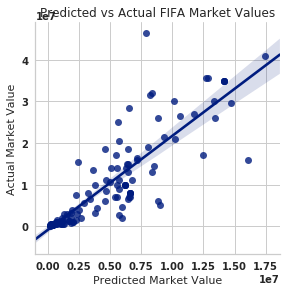

In [54]:
lm = sns.lmplot(x="Predicted", y="value_eur", data=scouting_report_pred)

# Get hold of the `Axes` objects
axes = lm.ax

plt.title('Predicted vs Actual FIFA Market Values')

# Set x-axis label
plt.xlabel('Predicted Market Value')
# Set y-axis label
plt.ylabel('Actual Market Value')

# Show the plot
plt.show()

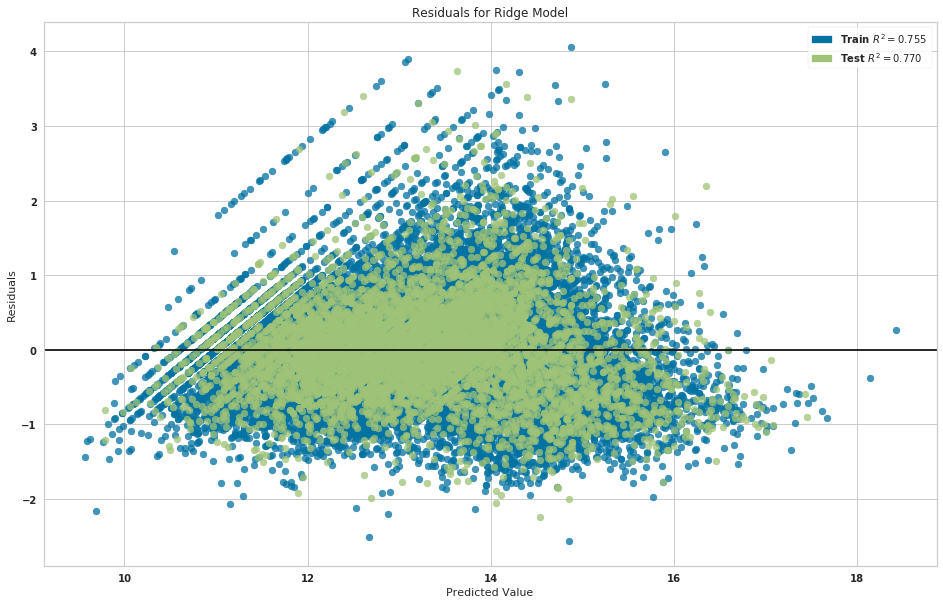

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()

visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()             # Finalize and render the figure

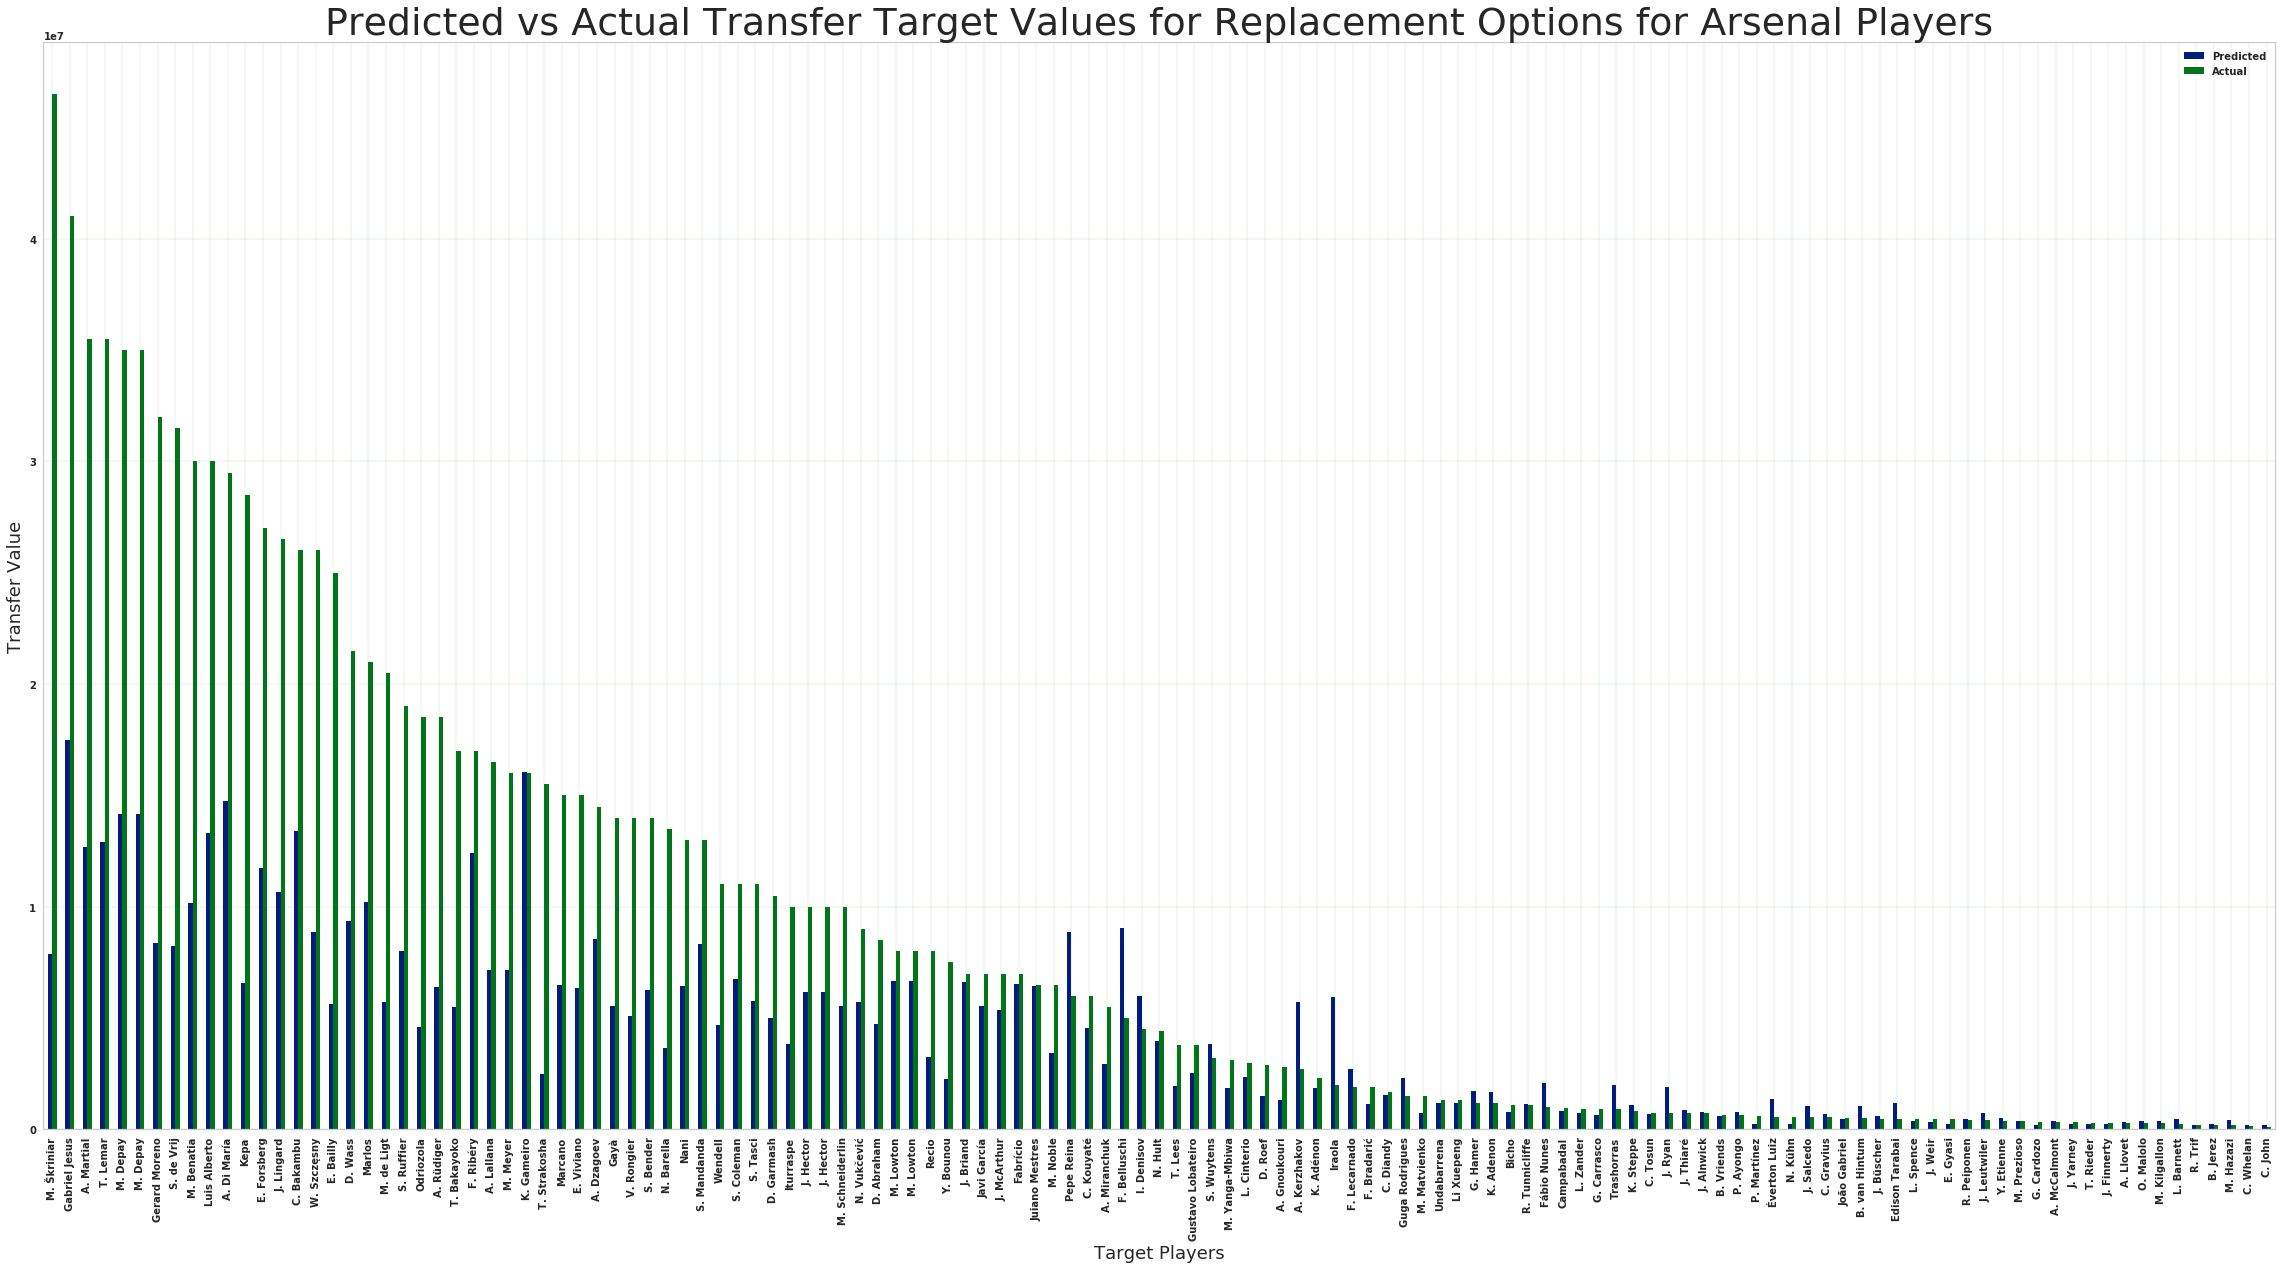

In [56]:
scouting_actual_pred.plot(kind='bar',figsize=(40,20))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.ylabel('Transfer Value', fontsize=18)
plt.xlabel('Target Players', fontsize=18)
plt.title('Predicted vs Actual Transfer Target Values for Replacement Options for Arsenal Players', fontsize=38)
plt.show()